In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
df= pd.read_csv("csv.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [15]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [17]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [18]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [20]:
df.shape
len(df)
#There are 550 number of records in the dataset

550

In [21]:
len(df.Name.value_counts())
#there are 351 number of unique books

351

In [22]:
#DUPLICATE RECORDS
x=df.groupby("Name")
y= x["User Rating"].mean().sort_values(ascending= False).head(10)
df.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition                      10
StrengthsFinder 2.0                                                                             9
Oh, the Places You'll Go!                                                                       8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                    7
The Very Hungry Caterpillar                                                                     7
                                                                                               ..
The Plant Paradox: The Hidden Dangers in "Healthy" Foods That Cause Disease and Weight Gain     1
Night (Night)                                                                                   1
When Breath Becomes Air                                                                         1
The Son of Neptune (Heroes of Olympus, Book 2)                                                  1
If I Stay           

In [24]:
#renaming user rating column
df.rename(columns={"User Rating":"User_rating"},inplace=True)

In [25]:
#there 28 books with highest user rating of 4.9
df.groupby("Name").User_rating.mean().sort_values(ascending= False).head(29)

Name
Strange Planet (Strange Planet Series)                                                                                     4.9
Unfreedom of the Press                                                                                                     4.9
Little Blue Truck                                                                                                          4.9
Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)    4.9
The Wonderful Things You Will Be                                                                                           4.9
Humans of New York : Stories                                                                                               4.9
Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)                                                   4.9
Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)                       

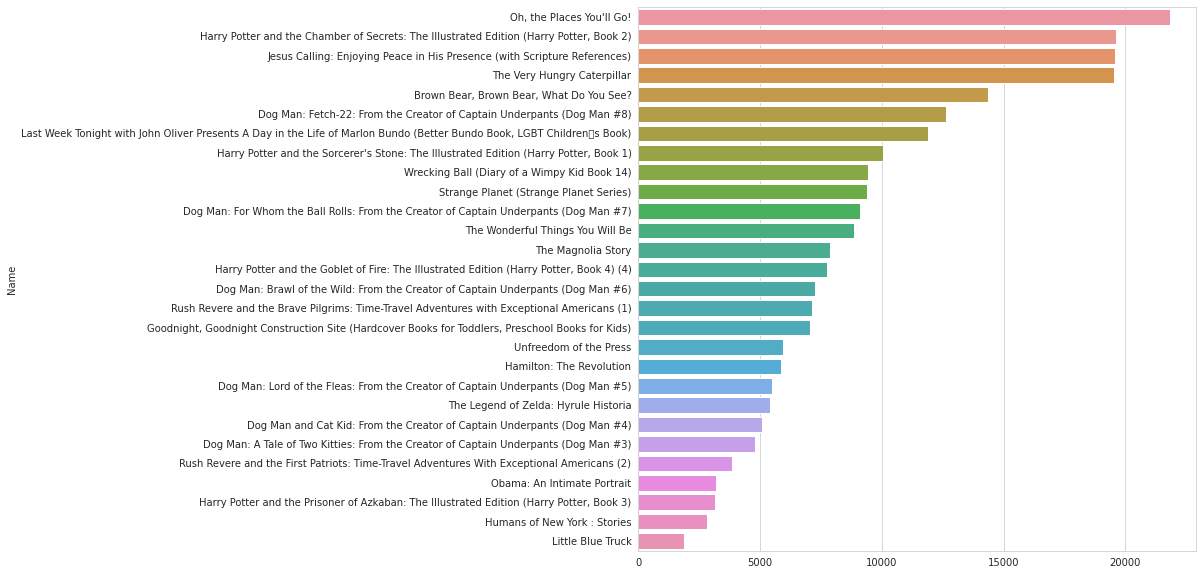

In [26]:
#Top rated books (rating=4.9) ploted based on their reviews
#Oh,the places you'll Go! is the top rated book with most reviews
x=df[df["User_rating"]==4.9]
y= x.groupby("Name").Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)

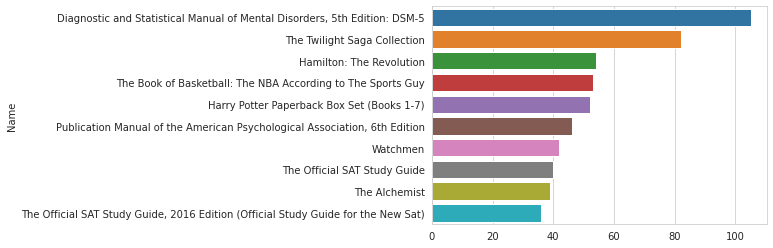

In [27]:
#most expensive books
x= df.groupby("Name").Price.mean().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

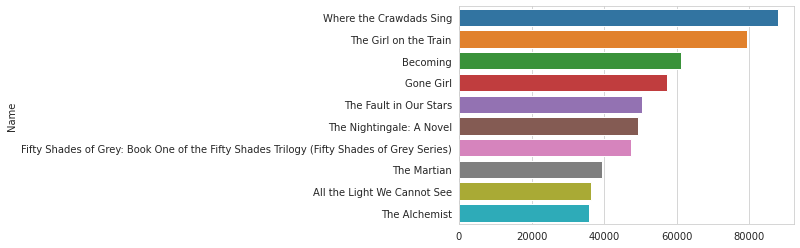

In [28]:
#Most reviewed books
x= df.groupby("Name").Reviews.mean().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

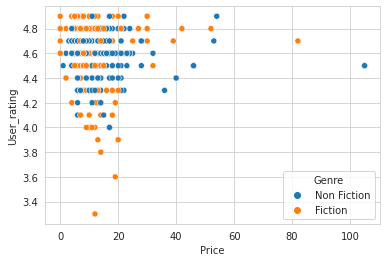

In [29]:
#user ratings and price relation
sns.scatterplot(x="Price",y= "User_rating",data= df,hue= "Genre")

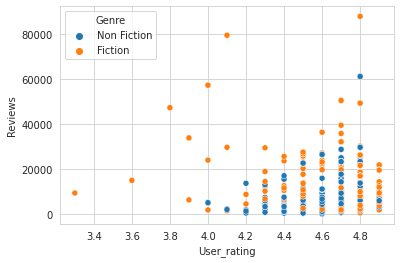

In [30]:
#user ratings and reviews relation
sns.scatterplot(x="User_rating",y= "Reviews",data= df,hue= "Genre")

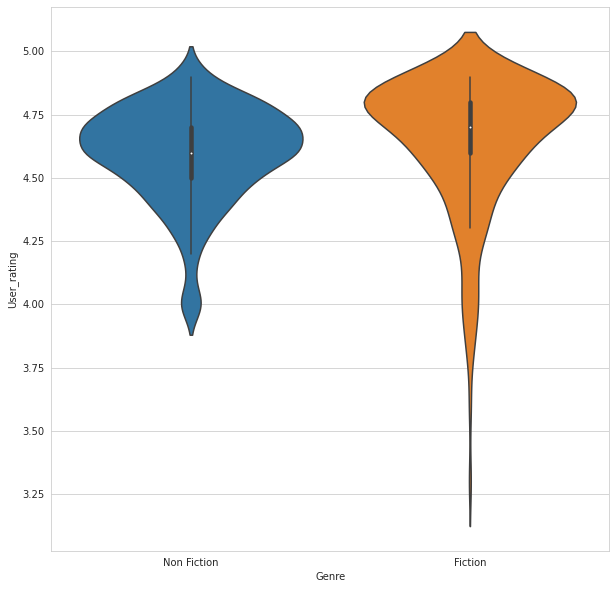

In [31]:
#violin plot ratings based on genres
plt.figure(figsize= (10,10))
sns.violinplot(x= "Genre",y= "User_rating",data= df)

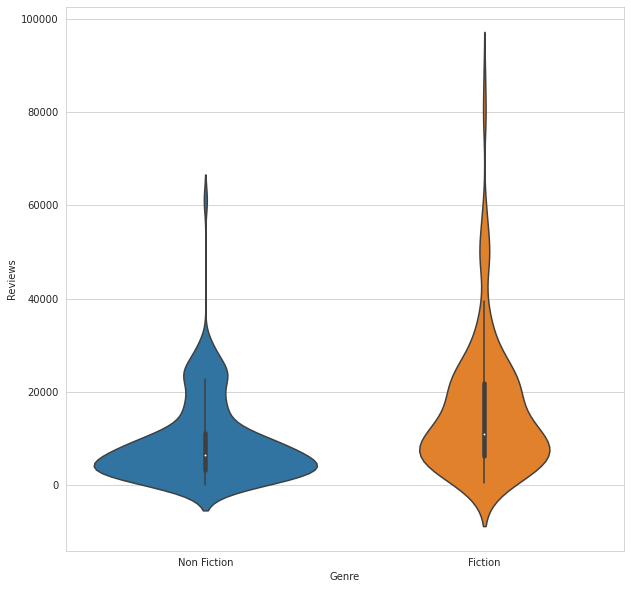

In [32]:
#violin plot reviews based on genres

plt.figure(figsize= (10,10))
sns.violinplot(x= "Genre",y= "Reviews",data= df)

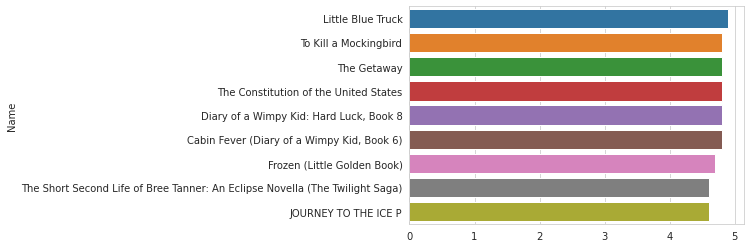

In [33]:
#Top rated free books
x= df[df["Price"]==0]
y= x.groupby("Name").User_rating.mean().sort_values(ascending = False).head(20)
sns.barplot(y.values,y.index)

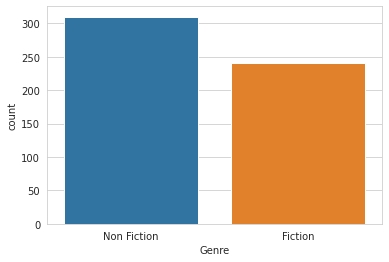

In [34]:
sns.countplot(x= "Genre",data= df)

Text(0.5, 0, 'Ratings')

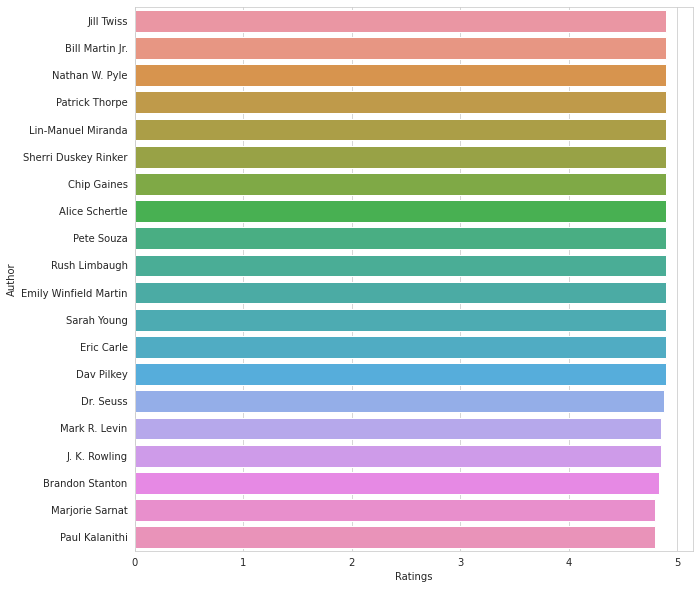

In [35]:
#top rated authors
x= df.groupby("Author").User_rating.mean().sort_values(ascending= False).head(20)
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Ratings")

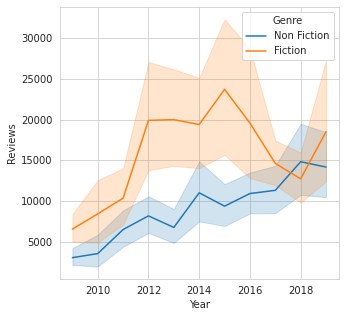

In [36]:
#reviews over the years
plt.figure(figsize= (5,5))
sns.lineplot(x= "Year",y= "Reviews",data= df,hue="Genre")

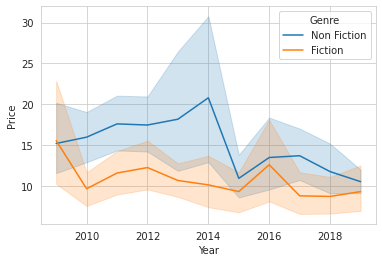

In [37]:
#prices over the years
sns.lineplot(x= "Year",y= "Price",data= df,hue="Genre")

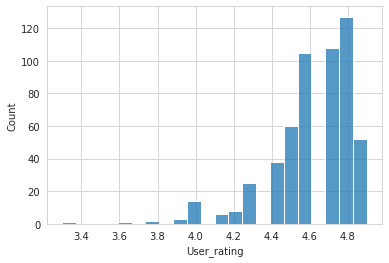

In [38]:
#user rating distribution
sns.histplot(df,x= "User_rating")

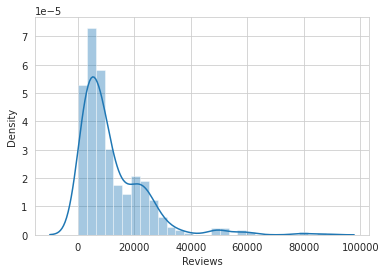

In [39]:
#reviews distribution
sns.distplot(df.Reviews)

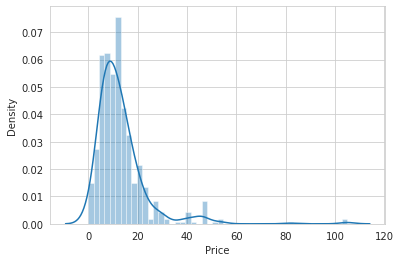

In [40]:
#price distribution
sns.distplot(df.Price)

In [41]:
#Top rated books in non fiction genre
x= df[df["Genre"]=="Non Fiction"]
x.groupby("Name").User_rating.mean().sort_values(ascending= False).head(10)

Name
The Magnolia Story                                                                                4.9
Hamilton: The Revolution                                                                          4.9
Obama: An Intimate Portrait                                                                       4.9
Humans of New York : Stories                                                                      4.9
Unfreedom of the Press                                                                            4.9
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                         4.9
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics    4.8
Happy, Happy, Happy: My Life and Legacy as the Duck Commander                                     4.8
The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma                          4.8
Have a Little Faith: A True Story                                            

In [42]:
#Top rated Authors in non fiction genre

x.groupby("Author").User_rating.mean().sort_values(ascending= False).head(10)

Author
Chip Gaines           4.900000
Pete Souza            4.900000
Lin-Manuel Miranda    4.900000
Sarah Young           4.900000
Mark R. Levin         4.850000
Brandon Stanton       4.833333
Raina Telgemeier      4.800000
Michelle Obama        4.800000
Samin Nosrat          4.800000
Ron Chernow           4.800000
Name: User_rating, dtype: float64

In [43]:
#Top rated books(rating= 4.9) in fiction genre based on reviews
x= df[df["Genre"]=="Fiction"]
x= x[x["User_rating"]==4.9]
x.groupby("Name").Reviews.mean().sort_values(ascending= False).head(10)

Name
Oh, the Places You'll Go!                                                                                                  21834
Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)                                    19622
The Very Hungry Caterpillar                                                                                                19546
Brown Bear, Brown Bear, What Do You See?                                                                                   14344
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8)                                                     12619
Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)    11881
Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)                                      10052
Wrecking Ball (Diary of a Wimpy Kid Book 14)                                                